In [46]:
from numpy.random import seed 
seed(8)
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split 
%matplotlib inline


Nesta tarefa, irá utilizar o conjunto de dados Iris. Consiste em 50 amostras de cada uma das três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Foram medidas quatro características de cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros. Para uma referência, ver os seguintes artigos:

- R. A. Fisher. "The use of multiple measurements in taxonomic problems". Annals of Eugenics. 7 (2): 179–188, 1936.

In [47]:
def read_in_and_split_data(iris_data):

  data = iris_data['data']
  targets = iris_data['target']

  train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

  return train_data, test_data, train_targets, test_targets

In [48]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [49]:
#Codificar os dados
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [50]:
#Criando a rede neural

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import he_uniform, Ones

def get_model(input_shape):
   model = Sequential([
                     Dense(64, input_shape=input_shape,
                      kernel_initializer=he_uniform(), bias_initializer=Ones()),
                     Dense(128, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(128, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(64, activation='relu'),
                     Dense(3, activation='softmax')
  ])
   
   return model

In [51]:
model = get_model(train_data[0].shape)

In [52]:
def compile_model(model):

    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

    model.compile(
        optimizer = opt,
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )

In [53]:
compile_model(model)

In [54]:
#definindo o treinamento do modelo

def train_model(model, train_data, test_targets, epochs):

  history = model.fit(train_data, train_targets, epochs=epochs, batch_size=40,
                      validation_split=0.5)

  return history

In [55]:
history = train_model(model, train_data, test_targets, epochs=800)

Epoch 1/800
2/2 [==============================] - 2s 185ms/step - loss: 1.2523 - accuracy: 0.3582 - val_loss: 1.2476 - val_accuracy: 0.2941
Epoch 2/800
2/2 [==============================] - 0s 29ms/step - loss: 1.1658 - accuracy: 0.3582 - val_loss: 1.1668 - val_accuracy: 0.2941
Epoch 3/800
2/2 [==============================] - 0s 26ms/step - loss: 1.1044 - accuracy: 0.3582 - val_loss: 1.1199 - val_accuracy: 0.2941
Epoch 4/800
2/2 [==============================] - 0s 38ms/step - loss: 1.0669 - accuracy: 0.3582 - val_loss: 1.0776 - val_accuracy: 0.2941
Epoch 5/800
2/2 [==============================] - 0s 25ms/step - loss: 1.0306 - accuracy: 0.3582 - val_loss: 1.0399 - val_accuracy: 0.2941
Epoch 6/800
2/2 [==============================] - 0s 29ms/step - loss: 0.9989 - accuracy: 0.3582 - val_loss: 1.0076 - val_accuracy: 0.2941
Epoch 7/800
2/2 [==============================] - 0s 20ms/step - loss: 0.9697 - accuracy: 0.3582 - val_loss: 0.9839 - val_accuracy: 0.2941
Epoch 8/800
2/2 [==

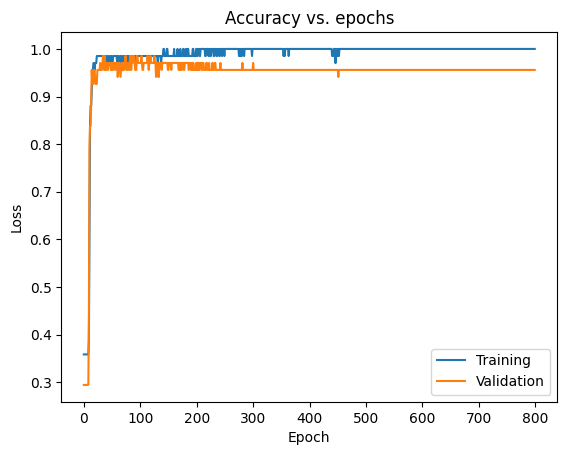

In [56]:
#Plot epochs vs accuracy

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

In [66]:
#Modelos com regularização
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout, BatchNormalization

def get_regularised_model(input_shape, dropout_rate, weight_decay):
  
    model = Sequential([
                        Dense(64, input_shape=input_shape,
                             kernel_initializer='he_uniform', bias_initializer='ones',
                             kernel_regularizer=l2(weight_decay)),
                        Dense(128, activation='relu',kernel_regularizer=l2(weight_decay)),
                        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dropout(dropout_rate),
                        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
                        BatchNormalization(),   
                        Dense(128, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dropout(dropout_rate),
                        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dense(64, activation='relu', kernel_regularizer=l2(weight_decay)),
                        Dense(3, activation='softmax')
    ])
    
    return model
    

In [67]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [69]:
compile_model(reg_model)

In [70]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
2/2 [==============================] - 2s 249ms/step - loss: 1.9916 - accuracy: 0.2687 - val_loss: 2.0086 - val_accuracy: 0.3382
Epoch 2/800
2/2 [==============================] - 0s 32ms/step - loss: 2.0055 - accuracy: 0.2537 - val_loss: 2.0005 - val_accuracy: 0.3382
Epoch 3/800
2/2 [==============================] - 0s 35ms/step - loss: 1.9896 - accuracy: 0.2836 - val_loss: 1.9933 - val_accuracy: 0.3382
Epoch 4/800
2/2 [==============================] - 0s 31ms/step - loss: 1.9746 - accuracy: 0.2537 - val_loss: 1.9862 - val_accuracy: 0.3235
Epoch 5/800
2/2 [==============================] - 0s 29ms/step - loss: 1.9549 - accuracy: 0.3731 - val_loss: 1.9805 - val_accuracy: 0.2794
Epoch 6/800
2/2 [==============================] - 0s 36ms/step - loss: 1.9890 - accuracy: 0.2836 - val_loss: 1.9737 - val_accuracy: 0.2647
Epoch 7/800
2/2 [==============================] - 0s 37ms/step - loss: 1.9613 - accuracy: 0.3433 - val_loss: 1.9656 - val_accuracy: 0.2647
Epoch 8/800
2/2 [==

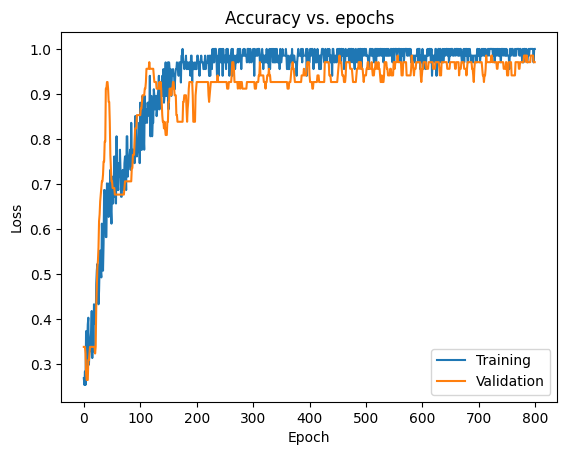

In [71]:
try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

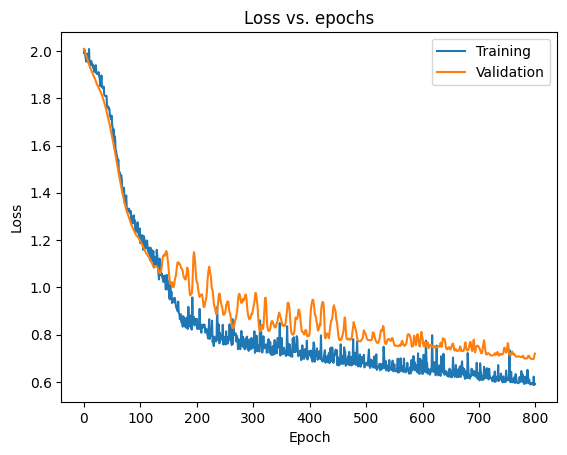

In [72]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [73]:
#Criando chamada

def get_callbacks():

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, mode='min')
    lr_reduce = tf.keras.callbacks.ReduceLROnPlateau(patience=20, factor=0.2)
    
    return early_stopping, lr_reduce

In [74]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [75]:
learning_rate_reduction.patience

20

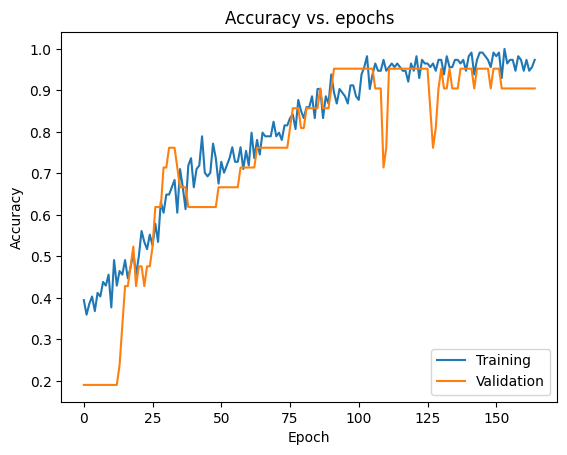

In [76]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

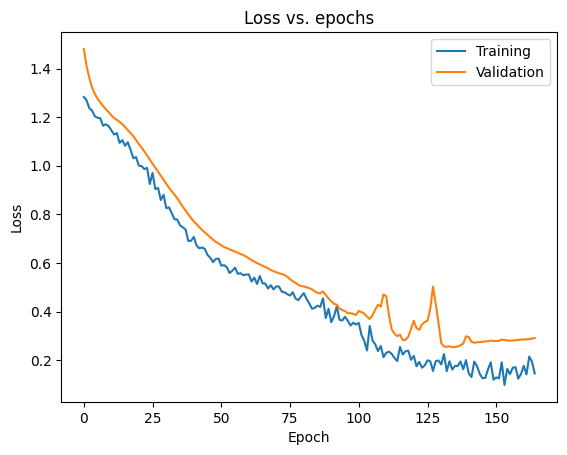

In [77]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [78]:

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.231
Test accuracy: 86.67%
